In [1]:
import os
import sys
from gurobipy import *
import pandas as pd
import numpy as np
import itertools
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

module_path = os.path.abspath("..")
sys.path.append(module_path)
from module.modele2 import init_model,Taches
from module.utils2 import (
    read_sillon,
    init_t_a,
    init_t_d,
    init_dict_correspondance,
    base_time,
    init_limites_voies,
    dernier_depart,
    ecriture_donnees_sortie_jalon2,
    ecriture_donnees_sortie_jalon3,
    nombre_max_agents_sur_roulement,
    nombre_roulements,
    roulements_operants_sur_tache,
    heure_debut_roulement,
    comp,
)
from module.visualisation2 import (
    visualisation_gantt,
    visualisation_occupation
)

In [2]:
# Charger le fichier Excel

id_file = 3

if id_file == 0:
    file = "mini_instance.xlsx"
elif id_file == 1:    
    file = "instance_WPY_realiste_jalon1.xlsx"
elif id_file == 2:
    file = "instance_WPY_realiste_jalon2.xlsx"
elif id_file == 3:
    file = "instance_WPY_simple.xlsx"
else:
    raise ValueError(f"Erreur : '{id_file}' n'est pas une valeur acceptable. Choisissez parmi 0, 1, 2 et 3.")

# Lire les feuilles "Sillons arrivée" et "Sillons départ"
df_sillons_arr, df_sillons_dep = read_sillon(file)

# Dictionnaires pour stocker les temps d'arrivée et de départ en minutes :
# Traitement des arrivées
t_a = init_t_a(df_sillons_arr, id_file)

t_d = init_t_d(df_sillons_dep, id_file)

time_base=base_time(id_file)

#Initialisation de l'intervalle de temps étudié
t_min=0
t_max=int(dernier_depart(df_sillons_dep,time_base)) #en quinzaine de minutes
#print(t_max//15+1)

# Vérification finale
#print("Vérification du contenu final de t_a :")
#for key, value in t_a.items():
#    print(f"Le train {key} arrive en gare de Woippy au bout de {value} minutes")

#print("Vérification du contenu final de t_d :")
#for key, value in t_d.items():
#    print(f"Le train {key} part de la gare de Woippy au bout de {value} minutes")

df_correspondance = pd.read_excel(file, sheet_name="Correspondances")

D = init_dict_correspondance(df_correspondance, id_file)
#print(D)

temps_min = 0
temps_max = int(t_max//15+1)

nb_roulements=nombre_roulements(file)

h_deb, nb_cycles_agents, nb_cycle_jour=heure_debut_roulement(file,temps_min,temps_max)
#print(nb_cycles_agents)
#print(h_deb)

#print(comp(file))
comp_arr, comp_dep = comp(file)

equip=roulements_operants_sur_tache(file)

print(equip)
print(nombre_max_agents_sur_roulement(file))

{1: [Timestamp('2022-08-08 05:00:00'), Timestamp('2022-08-08 13:00:00'), Timestamp('2022-08-08 21:00:00'), Timestamp('2022-08-09 05:00:00'), Timestamp('2022-08-09 13:00:00'), Timestamp('2022-08-09 21:00:00'), Timestamp('2022-08-10 05:00:00'), Timestamp('2022-08-10 13:00:00'), Timestamp('2022-08-10 21:00:00'), Timestamp('2022-08-11 05:00:00'), Timestamp('2022-08-11 13:00:00'), Timestamp('2022-08-11 21:00:00'), Timestamp('2022-08-12 05:00:00'), Timestamp('2022-08-12 13:00:00'), Timestamp('2022-08-12 21:00:00'), Timestamp('2022-08-13 05:00:00'), Timestamp('2022-08-13 13:00:00'), Timestamp('2022-08-13 21:00:00'), Timestamp('2022-08-14 05:00:00'), Timestamp('2022-08-14 13:00:00'), Timestamp('2022-08-14 21:00:00'), Timestamp('2022-08-15 05:00:00'), Timestamp('2022-08-15 13:00:00'), Timestamp('2022-08-15 21:00:00')], 2: [Timestamp('2022-08-08 05:00:00'), Timestamp('2022-08-08 13:00:00'), Timestamp('2022-08-08 21:00:00'), Timestamp('2022-08-09 05:00:00'), Timestamp('2022-08-09 13:00:00'), Time

In [3]:
model,t_arr,t_dep, is_present, who_arr, who_dep = init_model(
    liste_id_train_arrivee = t_a.keys(),
    t_a = t_a,
    liste_id_train_depart = t_d.keys(),
    t_d = t_d,
    dict_correspondances = D,
    file=file,
    id_file = id_file,
    limites_voies=init_limites_voies(file),
    temps_max=temps_max,
    temps_min=temps_min,
    nb_cycles_agents=nb_cycles_agents,
    heure_debut_roulement=h_deb,
    nombre_roulements=nb_roulements,
    equip=equip,
    max_agents_sur_roulement=nombre_max_agents_sur_roulement(file),
    #nombre_cycles=nombre_cycles_agents(file,temps_min,temps_max),
    h_deb=h_deb,
    comp_arr=comp_arr,
    comp_dep=comp_dep,
    nb_cycle_jour=nb_cycle_jour
)


Set parameter Username
Set parameter LicenseID to value 2617576
Academic license - for non-commercial use only - expires 2026-02-03


Contrainte assurant la succession des tâches sur les trains d'arrivée: 100%|██████████| 18/18 [00:00<00:00, 895.17it/s]
Contrainte assurant la succession des tâches sur les trains de départ: 100%|██████████| 18/18 [00:00<00:00, 8606.64it/s]
Contrainte assurant qu'il n'y a qu'un train niveau de la machine DEB: 100%|██████████| 18/18 [00:00<00:00, 685.84it/s]
Contrainte assurant qu'il n'y a qu'un train niveau des machines FOR et DEG: 100%|██████████| 2/2 [00:00<00:00, 40.95it/s]
Contrainte de fermeture du Chantier FOR: 100%|██████████| 18/18 [00:00<00:00, 485.12it/s]
Contrainte assurant la succession des tâches entre les chantiers de REC et FOR: 100%|██████████| 18/18 [00:00<00:00, 14215.30it/s]
Contrainte relative au nombre de voies des chantiers: 100%|██████████| 670/670 [00:00<00:00, 11419.89it/s]
Contrainte définissant le temps de débranchement du premier wagon d'un train de départ: 100%|██████████| 18/18 [00:00<00:00, 902.17it/s]


In [4]:
model.optimize()

if model.status == GRB.INFEASIBLE:
    print("Le modèle n'a pas de solution")
elif model.status == GRB.UNBOUNDED:
    print("Le modèle est non borné")
else:
    print("Ca marche !")
    for (m, n), var in t_arr.items():
        print(f"Tâche {m} - Train {n} : {15*var.x}")
    for (m, n), var in t_dep.items():
        print(f"Tâche {m} - Train {n} : {15*var.x}")
    print('La valeur objectif est :', model.objVal)

Ca marche !
Tâche 1 - Train A1_08 : 600.0
Tâche 1 - Train A3_08 : 1320.0
Tâche 1 - Train A2_08 : 705.0
Tâche 1 - Train A2_09 : 2130.0
Tâche 1 - Train A3_09 : 2760.0
Tâche 1 - Train A1_09 : 2040.0
Tâche 1 - Train A3_10 : 4200.0
Tâche 1 - Train A1_10 : 3480.0
Tâche 1 - Train A2_10 : 3570.0
Tâche 1 - Train A2_11 : 5010.0
Tâche 1 - Train A1_11 : 4920.0
Tâche 1 - Train A3_11 : 5655.0
Tâche 1 - Train A2_12 : 6450.0
Tâche 1 - Train A3_12 : 7155.0
Tâche 1 - Train A1_12 : 6360.0
Tâche 1 - Train A3_13 : 8535.0
Tâche 1 - Train A4_13 : 7725.0
Tâche 1 - Train A4_14 : 9165.0
Tâche 2 - Train A1_08 : 630.0
Tâche 2 - Train A3_08 : 1335.0
Tâche 2 - Train A2_08 : 720.0
Tâche 2 - Train A2_09 : 2160.0
Tâche 2 - Train A3_09 : 2805.0
Tâche 2 - Train A1_09 : 2055.0
Tâche 2 - Train A3_10 : 4260.0
Tâche 2 - Train A1_10 : 3495.0
Tâche 2 - Train A2_10 : 3585.0
Tâche 2 - Train A2_11 : 5070.0
Tâche 2 - Train A1_11 : 4965.0
Tâche 2 - Train A3_11 : 5685.0
Tâche 2 - Train A2_12 : 6465.0
Tâche 2 - Train A3_12 : 7170.0


In [5]:
visualisation_gantt(t_arr,t_dep).show()

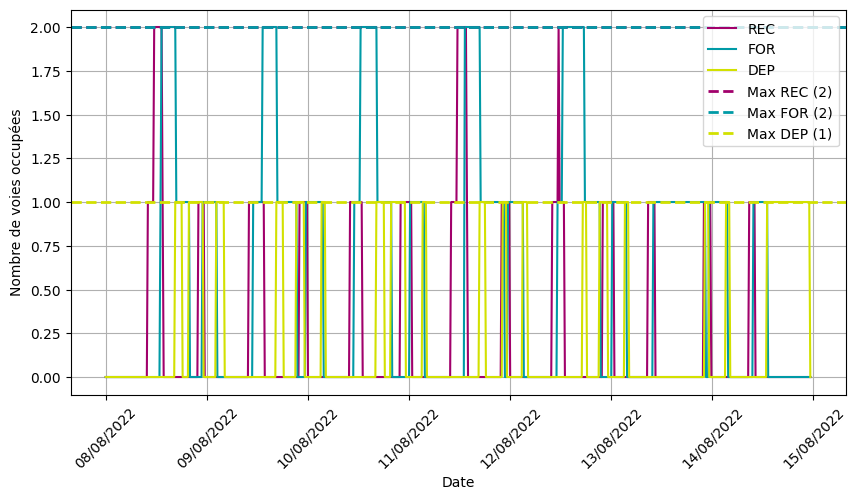

In [6]:
# Correction du format de la date de référence
ref_date = datetime.datetime.strptime("08/08/2022", "%d/%m/%Y")

# Conversion des temps en dates au format "dd/mm/yyyy/HH/MM"
x_date = [ref_date + datetime.timedelta(minutes=15*t) for t in range((t_max-t_min)//15+2)]

# Calcul des voies occupées pour chaque chantier
occupation_REC = np.array([quicksum(is_present['REC'][(id_train, t)].X for id_train in t_a.keys()).getValue() for t in range((t_max-t_min)//15+2)])
occupation_FOR = np.array([quicksum(is_present['FOR'][(id_train, t)].X for id_train in t_d.keys()).getValue() for t in range((t_max-t_min)//15+2)])
occupation_DEP = np.array([quicksum(is_present['DEP'][(id_train, t)].X for id_train in t_d.keys()).getValue() for t in range((t_max-t_min)//15+2)])

if visualisation_occupation(occupation_REC, occupation_FOR, occupation_DEP, x_date):
    plt.show()


In [7]:
ecriture_donnees_sortie_jalon2(
    t_arr, 
    t_dep, 
    occupation_REC, 
    occupation_FOR, 
    occupation_REC, 
    x_date
)

True

In [8]:
ecriture_donnees_sortie_jalon3(
    file,
    t_arr,
    t_dep,
    h_deb,
    equip,
    nb_cycles_agents,
    who_arr,
    who_dep)

KeyError: 1